In [1]:
import json, tensorflow as tf, numpy as np, matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
PATH = f"D:/_WORK/Nikita/Target/NLP Binary Classifier/"
inputFilePath = f"{PATH}data/sarsactic-nonsarsactic-binary-classification-nlp-data.json"

modelPath = f'{PATH}model/sarsactic-nonsarsactic-max_length-{max_length}_embedding_dim-{embedding_dim}.h5'

with open(inputFilePath, 'r') as f:
    datastore = json.load(f)
    
print(datastore[0:2])

NameError: name 'max_length' is not defined

In [ ]:
# extract sentences and it's label

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    
sentences

In [ ]:
print(np.unique(labels))

In [ ]:
# split the data into training and validation

training_size = 20000  

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

print(len(training_sentences),  len(training_labels), len(testing_sentences), len(testing_labels))

In [ ]:
# Tokenization

vocab_size = 10000    # the total number of unique words in the input text
oov_tok = "<OOV>"     # create a token for that & replace the words that is not there
max_length = 100      # length of the input sequences, which is set to max_length in this case. The input sequences are expected to be padded or truncated to this length.
padding_type='post'   # equally-sized sequences by padding them with 0s at the front or back
trunc_type='post'     # to chop off the words at the end or beginning


# Tokenizer is the instance of tokenizer object
tokenizer = Tokenizer(num_words=vocab_size,
                      oov_token=oov_tok)

# tells tokenizer to go through all the text and then fit itself
tokenizer.fit_on_texts(training_sentences)

# word_index contains the full list of words
word_index = tokenizer.word_index

print(word_index)

In [24]:
# create sequences of numbers from the sentences

training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

# add padding to the text 

training_padded = pad_sequences(training_sequences,
                                maxlen=max_length,
                                padding=padding_type,
                                truncating=trunc_type)


testing_padded = pad_sequences(testing_sequences,
                               maxlen=max_length,
                               padding=padding_type,
                               truncating=trunc_type)


In [25]:
# Need this block to get it to work with TensorFlow 2.x

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [26]:

embedding_dim = 16    # the number of features to represent each word ; the dimensionality of the word embeddings

model = tf.keras.Sequential([
    
    # This layer represents word embeddings, which are dense vector representations of words in a continuous space
    tf.keras.layers.Embedding(vocab_size, # the total number of unique words in the input text
                              embedding_dim, # the dimensionality of the word embeddings, i.e., the number of features to represent each word
                              input_length=max_length), # length of the input sequences, which is set to max_length in this case. The input sequences are expected to be padded or truncated to this length.

    # this layer performs global average pooling on the embedded sequences. 
    # it computes the average of the feature values for each feature dimension across the entire sequence,
    # resulting in a fixed-size output regardless of the input sequence length.
    tf.keras.layers.GlobalAveragePooling1D(),
    
    #  fully connected dense layer with 24 units and ReLU (Rectified Linear Unit) activation function.
    # it introduces non-linearity into the model and learns higher-level representations of the features.
    tf.keras.layers.Dense(24,
                          activation='relu'),
    
    # the output layer with a single sigmoid activation unit, which produces a binary classification prediction (either 0 or 1) for each input text sequence
    tf.keras.layers.Dense(1,
                          activation='sigmoid')
])


#  configure the training process of a neural network model
model.compile(loss='binary_crossentropy', # specifies the loss function that will be used during training to measure the discrepancy between the predicted output and the ground truth.
              optimizer='adam', # optimizer algorithm that adjusts the weights based on the calculated gradients of the loss function, with the goal of minimizing the loss during training
              # adam is the popular choice for gradient-based optimization due to its adaptive learning rate and momentum
              metrics=['accuracy'] # specifies the evaluation metrics that will be calculated and reported during training and evaluation of the mode
             )

In [27]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [28]:
num_epochs = 30
history = model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded,
                                     testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6665 - accuracy: 0.5656 - val_loss: 0.6035 - val_accuracy: 0.7143 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4481 - accuracy: 0.8141 - val_loss: 0.3842 - val_accuracy: 0.8441 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3056 - accuracy: 0.8821 - val_loss: 0.3528 - val_accuracy: 0.8520 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2511 - accuracy: 0.9031 - val_loss: 0.3427 - val_accuracy: 0.8574 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 1s - loss: 0.2156 - accuracy: 0.9175 - val_loss: 0.3463 - val_accuracy: 0.8547 - 1s/epoch - 2ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1911 - accuracy: 0.9268 - val_loss: 0.3595 - val_accuracy: 0.8517 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1677 - accuracy: 0.9362 - val_loss: 0.3684 - val_accuracy: 0.8547 - 1s/epoch - 2ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1489 - accuracy: 0.9456 - val_loss: 0.3872 - val_accuracy: 0.8529 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

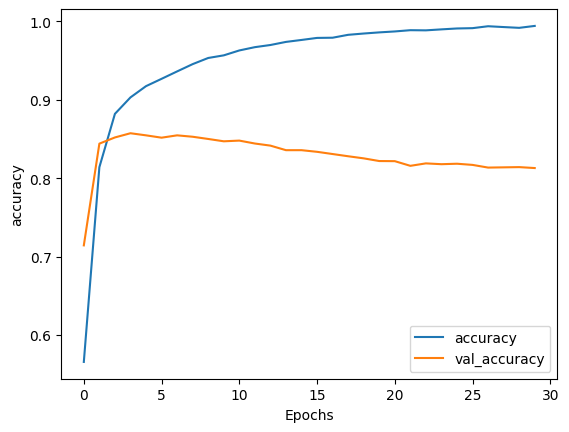

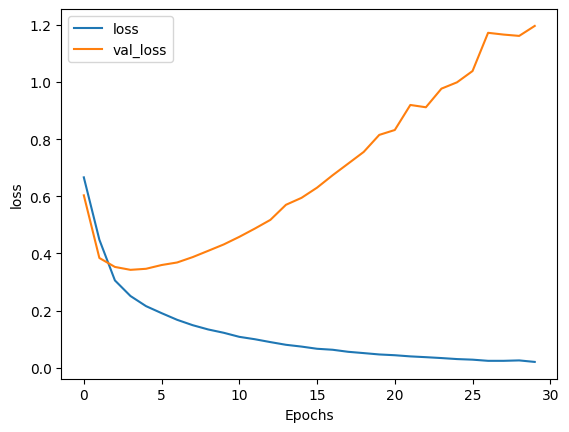

In [29]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [30]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(type(training_sentences[2]), len(training_sentences[2]), labels[2])

print(decode_sentence(training_padded[1]))
print(training_sentences[2])
print(type(training_sentences[2]), len(training_sentences[2]), labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
<class 'str'> 79 1
the 'roseanne' revival catches up to our <OOV> political mood for better and worse ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
<class 'str'> 79 1


In [31]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [33]:
import io

# .tsv file are Tab-Separated Values
vecsFilePath = f"{PATH}output/vecs.tsv"
metaFilePath = f"{PATH}output/meta.tsv"


# This file will be used to store the word embeddings.
# contains the word embeddings, with each row representing a different word and each column representing a different dimension of the embedding space
out_v = io.open(vecsFilePath, 'w', encoding='utf-8')
# This file will be used to store the corresponding words for each row of embeddings in vecs.tsv
# contains the corresponding words for each row in vecs.tsv, allowing for easy interpretation and visualization of the embeddings
out_m = io.open(metaFilePath, 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    # retrieves the embedding vector corresponding to the current index word_num
    embeddings = weights[word_num]
    
    # The saved files can then be downloaded and used to visualize the word embeddings in tools like TensorBoard.
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

    
out_v.close()
out_m.close()

In [34]:
# downloads the saved files to the local machine when running in Google Colab.
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download(vecsFilePath)
    files.download(metaFilePath)

In [35]:
sentence = ["granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences,
                       maxlen=max_length,
                       padding=padding_type,
                       truncating=trunc_type)

predictions = model.predict(padded)
print(predictions)

1/1 [==============================] - 0s 76ms/step
[[9.6080673e-01]
 [1.4412685e-06]]


In [36]:
predicted_classes = [int(round(p[0])) for p in predictions]
print(predicted_classes)

[1, 0]


In [42]:
# Save the model to disk
model.save(modelPath)

# MODEL INFERENCE

In [55]:
sarcastic_statements = ["Oh great, another rainy day. I just love getting soaked on my way to work.",
                        "I'm so glad I spent all that time studying for that exam, just to fail anyway.",
                        "Wow, another meeting? This is exactly how I wanted to spend my Friday afternoon.",
                        "I love it when people don't use their turn signals. It really adds an element of surprise to my daily commute.",
                        "Yeah, because standing in line for two hours to get a coffee is my idea of a good time.",
                        "Of course I want to hear about your new diet. I find it endlessly fascinating.",
                        "I'm sure all these ads on YouTube are exactly what I wanted to see while trying to watch a video.",
                        "Oh, don't mind me. I'll just sit here and wait for you to finish your phone call while blocking the entire sidewalk.",
                        "I just love it when someone steals my parking spot. It's such a fun game of cat and mouse.",
                        "I really enjoy getting stuck in traffic for hours on end. It's a great way to unwind after a long day.",
                        "granny starting to fear spiders in the garden might be real",
                        "nuclear bomb detonates during rehearsal fo r 'spider-man' musical"]

non_sarcastic_statements = ["I can't wait to go on vacation and spend some time at the beach.",
                            "I just finished reading a really good book. I highly recommend it.",
                            "I'm looking forward to seeing my family this weekend. It's been a while since we've all been together.",
                            "I love going for walks in the park. It's so peaceful and relaxing.",
                            "I'm really proud of myself for finishing that project on time. It was a lot of hard work, but it paid off.",
                            "I had a great time at the party last night. It was so nice to catch up with old friends.",
                            "I'm feeling really motivated to start exercising more. I know it will be good for my health.",
                            "I just tried a new restaurant and the food was amazing. I can't wait to go back again.",
                            "I'm grateful for all the support and encouragement I've received from my friends and family.",
                            "I'm so lucky to have a job that I enjoy and coworkers who are supportive and kind.",
                            "game of thrones season finale showing this sunday night",
                            "I'm so excited to spend my vacation on the beach!",
                            "Oh, great. Another rainy day. Just what I wanted.",
                           ]

sarcastic_labels = [1]*len(sarcastic_statements)

non_sarcastic_labels = [0]*len(non_sarcastic_statements)


sentences = sarcastic_statements + non_sarcastic_statements
truelabels = sarcastic_labels + non_sarcastic_labels 

sentences, truelabels

(['Oh great, another rainy day. I just love getting soaked on my way to work.',
  "I'm so glad I spent all that time studying for that exam, just to fail anyway.",
  'Wow, another meeting? This is exactly how I wanted to spend my Friday afternoon.',
  "I love it when people don't use their turn signals. It really adds an element of surprise to my daily commute.",
  'Yeah, because standing in line for two hours to get a coffee is my idea of a good time.',
  'Of course I want to hear about your new diet. I find it endlessly fascinating.',
  "I'm sure all these ads on YouTube are exactly what I wanted to see while trying to watch a video.",
  "Oh, don't mind me. I'll just sit here and wait for you to finish your phone call while blocking the entire sidewalk.",
  "I just love it when someone steals my parking spot. It's such a fun game of cat and mouse.",
  "I really enjoy getting stuck in traffic for hours on end. It's a great way to unwind after a long day.",
  'granny starting to fear s

In [56]:
from tensorflow.keras.models import load_model

loaded_model = load_model(modelPath)

max_length = 100
embedding_dim = 16    # the number of features to represent each word ; the dimensionality of the word embeddings


sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,
                       maxlen=max_length,
                       padding=padding_type,
                       truncating=trunc_type)

predictions = loaded_model.predict(padded)
print(predictions)

predicted_classes = [int(round(p[0])) for p in predictions]
print(f"\npredicted_classes : \n{predicted_classes}")

1/1 [==============================] - 0s 184ms/step
[[7.1471528e-04]
 [4.4390492e-04]
 [4.5106083e-14]
 [8.7973455e-11]
 [7.9572117e-01]
 [5.6665567e-10]
 [2.6708438e-24]
 [9.9494910e-01]
 [9.9574661e-01]
 [6.5739882e-01]
 [9.6080673e-01]
 [9.9940008e-01]
 [2.5665709e-06]
 [9.9812919e-01]
 [5.8471118e-14]
 [1.3407189e-10]
 [1.6908568e-09]
 [7.6008558e-01]
 [6.4028946e-08]
 [3.6110886e-20]
 [7.8725391e-16]
 [4.0494589e-07]
 [1.4412685e-06]
 [3.0295200e-11]
 [7.8900810e-03]]

predicted_classes : 
[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [57]:
truelabels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [66]:
tp = 0
fp = 0
for pred_label, true_label in zip(predicted_classes, labels):
    if pred_label == true_label:
        tp+=1
    else:
        fp+=1  
        
tp,fp,len(sentences), tp/len(sentences)

(13, 12, 25, 0.52)